In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("titanic_train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Finding Missing Values

In [4]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

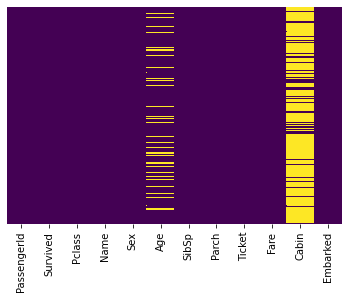

In [5]:
sns.heatmap(titanic.isnull() ,yticklabels=False ,cbar = False , cmap = "viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

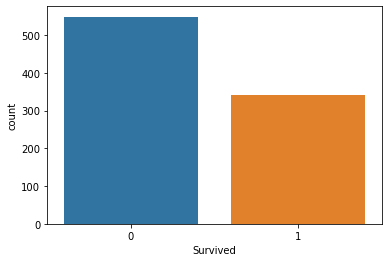

In [6]:
sns.countplot(x = "Survived" , data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

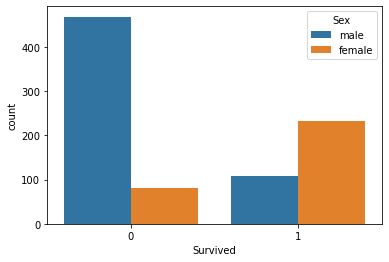

In [7]:
sns.countplot(x = "Survived" , hue = "Sex" , data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

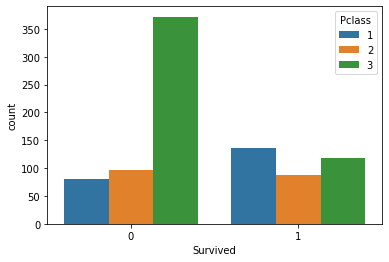

In [8]:
sns.countplot(x = "Survived" , hue = "Pclass" , data = titanic)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

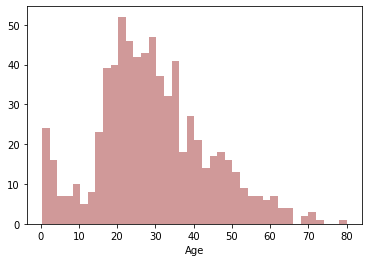

In [9]:
sns.distplot(titanic["Age"].dropna(), kde = False , color = "darkred" , bins = 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

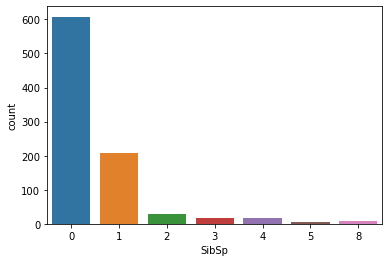

In [11]:
sns.countplot(x = "SibSp",data = titanic)

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

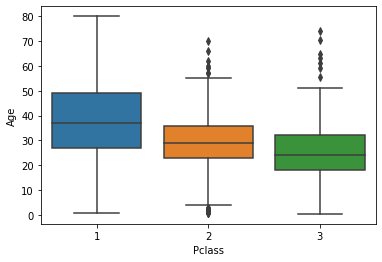

In [12]:
sns.boxplot(x = "Pclass" , y = "Age" , data = titanic)

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull():
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
        
        
    else:
        return Age

In [20]:
titanic["Age"] = titanic[["Age" , "Pclass"]].apply(impute_age , axis = 1)

TypeError: isna() missing 1 required positional argument: 'obj'

In [21]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

TypeError: isna() missing 1 required positional argument: 'obj'

In [22]:
titanic.drop("Cabin" , axis = 1,inplace = True)

# Converting Categorical Variable

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
pd.get_dummies(titanic["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [26]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
train = pd.concat([titanic,sex,embark],axis=1)

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
